# Homework Assignment - Lesson 5: Data Reshaping with tidyr

**Due Date:** [Insert Due Date Here]

**Instructions:**

- Complete the following tasks in this R notebook
- Use the pipe operator (`%>%`) and chain operations wherever possible
- Ensure your code is well-commented and easy to understand
- Submit your completed notebook file

---

## Part 1: Data Import and Setup

1. **Data Import:**
   - Download the following files from the course materials:
     - `quarterly_sales_wide.csv` - Sales data in wide format with quarters as columns
     - `survey_responses_long.csv` - Survey data in long format
     - `employee_skills_wide.csv` - Employee skills matrix in wide format
   - Import each file into appropriately named data frames.
   - Load the `tidyverse` package.

2. **Initial Exploration:**
   - Examine the structure of each dataset using `str()` and `head()`.
   - Identify which datasets are in "wide" format and which are in "long" format.
   - Note any patterns in column names that might be useful for reshaping.

---

In [1]:
# Load necessary packages
library(tidyverse) # includes tidyr

# set working directory 
setwd("/workspaces/homework5/data/")

# Import the required datasets
quarterly_sales_wide <- read.csv("quarterly_sales_wide.csv", stringsAsFactors = FALSE)
survey_responses_long <- read.csv("survey_responses_long.csv", stringsAsFactors = FALSE)
employee_skills_wide <- read.csv("employee_skills_wide.csv", stringsAsFactors = FALSE)

# Initial exploration
cat("=== QUARTERLY SALES DATA ===\n")
str(quarterly_sales_wide)
print(head(quarterly_sales_wide))

cat("\n=== SURVEY RESPONSES DATA ===\n")
str(survey_responses_long)
print(head(survey_responses_long))

cat("\n=== EMPLOYEE SKILLS DATA ===\n")
str(employee_skills_wide)
print(head(employee_skills_wide))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


=== QUARTERLY SALES DATA ===
'data.frame':	4 obs. of  8 variables:
 $ Region          : chr  "North" "South" "East" "West"
 $ Product_Category: chr  "Electronics" "Clothing" "Electronics" "Clothing"
 $ Q1_2023         : int  45000 32000 38000 28000
 $ Q2_2023         : int  48000 35000 41000 31000
 $ Q3_2023         : int  46000 33000 39000 29000
 $ Q4_2023         : int  52000 38000 44000 34000
 $ Q1_2024         : int  50000 36000 42000 32000
 $ Q2_2024         : int  54000 40000 46000 36000
  Region Product_Category Q1_2023 Q2_2023 Q3_2023 Q4_2023 Q1_2024 Q2_2024
1  North      Electronics   45000   48000   46000   52000   50000   54000
2  South         Clothing   32000   35000   33000   38000   36000   40000
3   East      Electronics   38000   41000   39000   44000   42000   46000
4   West         Clothing   28000   31000   29000   34000   32000   36000

=== SURVEY RESPONSES DATA ===
'data.frame':	250 obs. of  3 variables:
 $ Respondent_ID: int  1 1 1 1 1 2 2 2 2 2 ...
 $ Question  

## Part 2: Converting Wide to Long with `pivot_longer()`

1. **Basic Wide to Long Conversion:**
   - Using the `quarterly_sales_wide` dataset, convert it from wide to long format:
     - The quarter columns (e.g., `Q1_2023`, `Q2_2023`, etc.) should become values in a new column called `Quarter`
     - The sales values should go into a new column called `Sales_Amount`
     - Keep all other identifying columns (e.g., `Region`, `Product_Category`)
   - Store the result in a data frame called `quarterly_sales_long`.

2. **Advanced Wide to Long with Name Parsing:**
   - If the quarter columns contain both year and quarter information (e.g., `Q1_2023`, `Q2_2023`), use `names_sep` or `names_pattern` to separate this into two columns: `Quarter` and `Year`.
   - Store the result in a data frame called `quarterly_sales_parsed`.

3. **Employee Skills Conversion:**
   - Using the `employee_skills_wide` dataset, convert it from wide to long format:
     - Skill columns (e.g., `R_Programming`, `Excel`, `SQL`) should become values in a column called `Skill`
     - The proficiency levels should go into a column called `Proficiency_Level`
     - Keep employee identifying information
   - Store the result in a data frame called `employee_skills_long`.

---

In [2]:
# Task 2.1: Basic Wide to Long Conversion - Quarterly Sales
quarterly_sales_long <- quarterly_sales_wide %>%
  pivot_longer(
    cols = c("Q1_2023", "Q2_2023", "Q3_2023", "Q4_2023", "Q1_2024", "Q2_2024"),    # YOUR CODE HERE: specify quarter columns
    names_to = "Quarter",      # YOUR CODE HERE: name for quarter column
    values_to = "Sales_Amount"      # YOUR CODE HERE: name for sales values column
  )

print("Quarterly Sales - Long Format:")
print(head(quarterly_sales_long))

[1] "Quarterly Sales - Long Format:"


# A tibble: 6 × 4
  Region Product_Category Quarter Sales_Amount
  <chr>  <chr>            <chr>          <int>
1 North  Electronics      Q1_2023        45000
2 North  Electronics      Q2_2023        48000
3 North  Electronics      Q3_2023        46000
4 North  Electronics      Q4_2023        52000
5 North  Electronics      Q1_2024        50000
6 North  Electronics      Q2_2024        54000


In [3]:
# Task 2.2: Advanced Wide to Long with Name Parsing
quarterly_sales_parsed <- quarterly_sales_wide %>%
  pivot_longer(
    cols = c("Q1_2023", "Q2_2023", "Q3_2023", "Q4_2023", "Q1_2024", "Q2_2024"),  # YOUR CODE HERE: specify quarter columns
    names_to = c("Quarter", "Year"),  # YOUR CODE HERE: Quarter and Year columns
    names_sep = "_",                                 # YOUR CODE HERE: separator
    values_to = "Sales_Amount"                          # YOUR CODE HERE: sales values column
  )

print("Quarterly Sales - Parsed Format:")
print(head(quarterly_sales_parsed))

[1] "Quarterly Sales - Parsed Format:"
# A tibble: 6 × 5
  Region Product_Category Quarter Year  Sales_Amount
  <chr>  <chr>            <chr>   <chr>        <int>
1 North  Electronics      Q1      2023         45000
2 North  Electronics      Q2      2023         48000
3 North  Electronics      Q3      2023         46000
4 North  Electronics      Q4      2023         52000
5 North  Electronics      Q1      2024         50000
6 North  Electronics      Q2      2024         54000


In [4]:
# Task 2.3: Employee Skills Wide to Long
employee_skills_long <- employee_skills_wide %>%
  pivot_longer(
    cols = c("R_Programming", "Excel", "SQL", "Python", "Tableau"),    # YOUR CODE HERE: skill columns
    names_to = "Skill",      # YOUR CODE HERE: skill column name
    values_to = "Proficiency_Level"      # YOUR CODE HERE: proficiency column name
  )

print("Employee Skills - Long Format:")
print(head(employee_skills_long))

[1] "Employee Skills - Long Format:"
# A tibble: 6 × 5
  Employee_ID Employee_Name Department Skill         Proficiency_Level
        <int> <chr>         <chr>      <chr>                     <int>
1           1 Employee 1    Marketing  R_Programming                 4
2           1 Employee 1    Marketing  Excel                         4
3           1 Employee 1    Marketing  SQL                           4
4           1 Employee 1    Marketing  Python                        2
5           1 Employee 1    Marketing  Tableau                       4
6           2 Employee 2    Finance    R_Programming                 3


## Part 3: Converting Long to Wide with `pivot_wider()`

1. **Basic Long to Wide Conversion:**
   - Using the `survey_responses_long` dataset (which should have columns like `Respondent_ID`, `Question`, `Response`), convert it to wide format:
     - Each unique question should become a separate column
     - The responses should fill the cells
     - Each row should represent one respondent
   - Store the result in a data frame called `survey_responses_wide`.

2. **Aggregated Long to Wide:**
   - Using your `quarterly_sales_long` data from Part 2, create a wide format where:
     - Each region becomes a column
     - Each row represents a quarter-year combination
     - The values are the total sales for that region in that quarter
   - Store the result in a data frame called `sales_by_region_wide`.

3. **Skills Matrix Creation:**
   - Using your `employee_skills_long` data from Part 2, create a skills matrix where:
     - Each skill becomes a column
     - Each row represents an employee
     - The values are the proficiency levels
   - Store the result in a data frame called `skills_matrix`.

---

In [5]:
# Task 3.1: Survey Responses Long to Wide
survey_responses_wide <- survey_responses_long %>%
  pivot_wider(
    names_from = "Question",      # YOUR CODE HERE: column for new names
    values_from = "Response"      # YOUR CODE HERE: column for values
  )

print("Survey Responses - Wide Format:")
print(head(survey_responses_wide))

[1] "Survey Responses - Wide Format:"
# A tibble: 6 × 6
  Respondent_ID Product_Quality Customer_Service Value_for_Money Delivery_Speed
          <int>           <int>            <int>           <int>          <int>
1             1               5                4               3              4
2             2               1                3               2              3
3             3               3                3               2              3
4             4               3                5               4              1
5             5               5                1               4              4
6             6               2                1               4              4
# ℹ 1 more variable: Overall_Satisfaction <int>


In [6]:
# Task 3.2: Aggregated Long to Wide - Sales by Region
sales_by_region_wide <- quarterly_sales_long %>%
  pivot_wider(
    names_from = "Region",      # YOUR CODE HERE: region column
    values_from = "Sales_Amount"      # YOUR CODE HERE: sales column
  )

print("Sales by Region - Wide Format:")
print(head(sales_by_region_wide))

[1] "Sales by Region - Wide Format:"


# A tibble: 6 × 6
  Product_Category Quarter North South  East  West
  <chr>            <chr>   <int> <int> <int> <int>
1 Electronics      Q1_2023 45000    NA 38000    NA
2 Electronics      Q2_2023 48000    NA 41000    NA
3 Electronics      Q3_2023 46000    NA 39000    NA
4 Electronics      Q4_2023 52000    NA 44000    NA
5 Electronics      Q1_2024 50000    NA 42000    NA
6 Electronics      Q2_2024 54000    NA 46000    NA


In [7]:
str(employee_skills_long)

tibble [150 × 5] (S3: tbl_df/tbl/data.frame)
 $ Employee_ID      : int [1:150] 1 1 1 1 1 2 2 2 2 2 ...
 $ Employee_Name    : chr [1:150] "Employee 1" "Employee 1" "Employee 1" "Employee 1" ...
 $ Department       : chr [1:150] "Marketing" "Marketing" "Marketing" "Marketing" ...
 $ Skill            : chr [1:150] "R_Programming" "Excel" "SQL" "Python" ...
 $ Proficiency_Level: int [1:150] 4 4 4 2 4 3 5 2 4 2 ...


In [8]:
# Task 3.3: Skills Matrix Creation
skills_matrix <- employee_skills_long %>%
  pivot_wider(
    names_from = "Skill",      # YOUR CODE HERE: skill column
    values_from = "Proficiency_Level"      # YOUR CODE HERE: proficiency column
  )

print("Skills Matrix:")
print(head(skills_matrix))

[1] "Skills Matrix:"
# A tibble: 6 × 8
  Employee_ID Employee_Name Department R_Programming Excel   SQL Python Tableau
        <int> <chr>         <chr>              <int> <int> <int>  <int>   <int>
1           1 Employee 1    Marketing              4     4     4      2       4
2           2 Employee 2    Finance                3     5     2      4       2
3           3 Employee 3    Finance                1     2     1      4       4
4           4 Employee 4    IT                     4     5     3      5       2
5           5 Employee 5    Finance                1     2     1      2       1
6           6 Employee 6    IT                     5     2     1      4       1


## Part 4: Complex Reshaping Scenarios

1. **Multiple Value Columns:**
   - Create a dataset that has both `Sales_Amount` and `Profit_Amount` for each quarter and region.
   - Convert this to long format where you have separate rows for sales and profit, with a column indicating the metric type.
   - Then convert it back to wide format with quarters as columns.

2. **Handling Missing Values in Reshaping:**
   - When reshaping your data, some combinations might not exist (e.g., an employee might not have a rating for every skill).
   - Demonstrate how `pivot_wider()` handles missing values and how you can control this behavior using the `values_fill` argument.

3. **Nested Reshaping:**
   - Take your `quarterly_sales_long` data and create a summary that shows:
     - Average sales by product category and quarter
     - Convert this to wide format with quarters as columns
     - Then convert back to long format but group quarters into "H1" (Q1, Q2) and "H2" (Q3, Q4)

---

In [9]:
# Task 4.1: Multiple Value Columns
# YOUR CODE HERE: Create dataset with Sales_Amount and Profit_Amount
# adding profit amount as a column based on yearly sales
quarterly_sales_wide$Total_2023 <- quarterly_sales_wide$Q1_2023 +
                                   quarterly_sales_wide$Q2_2023 +
                                   quarterly_sales_wide$Q3_2023 +
                                   quarterly_sales_wide$Q4_2023

# Calculate profit as fraction for each 2023 quarter
quarterly_sales_wide$Profit_Q1_2023 <- quarterly_sales_wide$Q1_2023 / quarterly_sales_wide$Total_2023
quarterly_sales_wide$Profit_Q2_2023 <- quarterly_sales_wide$Q2_2023 / quarterly_sales_wide$Total_2023
quarterly_sales_wide$Profit_Q3_2023 <- quarterly_sales_wide$Q3_2023 / quarterly_sales_wide$Total_2023
quarterly_sales_wide$Profit_Q4_2023 <- quarterly_sales_wide$Q4_2023 / quarterly_sales_wide$Total_2023

# For 2024 (if only Q1 and Q2 exist)
quarterly_sales_wide$Total_2024 <- quarterly_sales_wide$Q1_2024 +
                                   quarterly_sales_wide$Q2_2024

quarterly_sales_wide$Profit_Q1_2024 <- quarterly_sales_wide$Q1_2024 / quarterly_sales_wide$Total_2024
quarterly_sales_wide$Profit_Q2_2024 <- quarterly_sales_wide$Q2_2024 / quarterly_sales_wide$Total_2024

#longer format with both sales and profit
sales_profit_long <- quarterly_sales_wide %>%
    pivot_longer(
        cols = c("Q1_2023", "Q2_2023", "Q3_2023", "Q4_2023", "Q1_2024", "Q2_2024"),  # YOUR CODE HERE: specify all relevant columns
        names_to = "Quarter",  
        values_to = "Sales_Amount"                          
    )
sales_profit_long <- sales_profit_long %>%
    pivot_longer(
        cols = c("Profit_Q1_2023", "Profit_Q2_2023", "Profit_Q3_2023", "Profit_Q4_2023", "Profit_Q1_2024", "Profit_Q2_2024"),  # YOUR CODE HERE: specify all relevant columns
        names_to = "Quarter_Profit",  
        values_to = "Profit_Amount"                          
    ) 

# Then demonstrate reshaping with multiple value columns
sales_profit_wide <- sales_profit_long %>%
  pivot_wider(
    names_from = "Quarter",      # YOUR CODE HERE: specify quarter and profit columns
    values_from = "Sales_Amount"      # YOUR CODE HERE: specify sales and profit columns
  )
sales_profit_wide <- sales_profit_wide %>%
  pivot_wider(
    names_from = "Quarter_Profit",      # YOUR CODE HERE: specify quarter and profit columns
    values_from = "Profit_Amount"      # YOUR CODE HERE: specify sales and profit columns
  )

str(sales_profit_long)
head(sales_profit_long)

str(sales_profit_wide)
head(sales_profit_wide)

tibble [144 × 8] (S3: tbl_df/tbl/data.frame)
 $ Region          : chr [1:144] "North" "North" "North" "North" ...
 $ Product_Category: chr [1:144] "Electronics" "Electronics" "Electronics" "Electronics" ...
 $ Total_2023      : int [1:144] 191000 191000 191000 191000 191000 191000 191000 191000 191000 191000 ...
 $ Total_2024      : int [1:144] 104000 104000 104000 104000 104000 104000 104000 104000 104000 104000 ...
 $ Quarter         : chr [1:144] "Q1_2023" "Q1_2023" "Q1_2023" "Q1_2023" ...
 $ Sales_Amount    : int [1:144] 45000 45000 45000 45000 45000 45000 48000 48000 48000 48000 ...
 $ Quarter_Profit  : chr [1:144] "Profit_Q1_2023" "Profit_Q2_2023" "Profit_Q3_2023" "Profit_Q4_2023" ...
 $ Profit_Amount   : num [1:144] 0.236 0.251 0.241 0.272 0.481 ...


Region,Product_Category,Total_2023,Total_2024,Quarter,Sales_Amount,Quarter_Profit,Profit_Amount
<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>
North,Electronics,191000,104000,Q1_2023,45000,Profit_Q1_2023,0.2356021
North,Electronics,191000,104000,Q1_2023,45000,Profit_Q2_2023,0.2513089
North,Electronics,191000,104000,Q1_2023,45000,Profit_Q3_2023,0.2408377
North,Electronics,191000,104000,Q1_2023,45000,Profit_Q4_2023,0.2722513
North,Electronics,191000,104000,Q1_2023,45000,Profit_Q1_2024,0.4807692
North,Electronics,191000,104000,Q1_2023,45000,Profit_Q2_2024,0.5192308


tibble [4 × 16] (S3: tbl_df/tbl/data.frame)
 $ Region          : chr [1:4] "North" "South" "East" "West"
 $ Product_Category: chr [1:4] "Electronics" "Clothing" "Electronics" "Clothing"
 $ Total_2023      : int [1:4] 191000 138000 162000 122000
 $ Total_2024      : int [1:4] 104000 76000 88000 68000
 $ Q1_2023         : int [1:4] 45000 32000 38000 28000
 $ Q2_2023         : int [1:4] 48000 35000 41000 31000
 $ Q3_2023         : int [1:4] 46000 33000 39000 29000
 $ Q4_2023         : int [1:4] 52000 38000 44000 34000
 $ Q1_2024         : int [1:4] 50000 36000 42000 32000
 $ Q2_2024         : int [1:4] 54000 40000 46000 36000
 $ Profit_Q1_2023  : num [1:4] 0.236 0.232 0.235 0.23
 $ Profit_Q2_2023  : num [1:4] 0.251 0.254 0.253 0.254
 $ Profit_Q3_2023  : num [1:4] 0.241 0.239 0.241 0.238
 $ Profit_Q4_2023  : num [1:4] 0.272 0.275 0.272 0.279
 $ Profit_Q1_2024  : num [1:4] 0.481 0.474 0.477 0.471
 $ Profit_Q2_2024  : num [1:4] 0.519 0.526 0.523 0.529


Region,Product_Category,Total_2023,Total_2024,Q1_2023,Q2_2023,Q3_2023,Q4_2023,Q1_2024,Q2_2024,Profit_Q1_2023,Profit_Q2_2023,Profit_Q3_2023,Profit_Q4_2023,Profit_Q1_2024,Profit_Q2_2024
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
North,Electronics,191000,104000,45000,48000,46000,52000,50000,54000,0.2356021,0.2513089,0.2408377,0.2722513,0.4807692,0.5192308
South,Clothing,138000,76000,32000,35000,33000,38000,36000,40000,0.2318841,0.2536232,0.2391304,0.2753623,0.4736842,0.5263158
East,Electronics,162000,88000,38000,41000,39000,44000,42000,46000,0.2345679,0.2530864,0.2407407,0.2716049,0.4772727,0.5227273
West,Clothing,122000,68000,28000,31000,29000,34000,32000,36000,0.2295082,0.2540984,0.2377049,0.2786885,0.4705882,0.5294118


In [10]:
# Task 4.2: Handling Missing Values
# YOUR CODE HERE: Demonstrate missing value handling in pivot_wider()
sales_by_region_wide_NA <- quarterly_sales_long %>%
  pivot_wider(
    names_from = "Region",      # YOUR CODE HERE: region column
    values_from = "Sales_Amount"      # YOUR CODE HERE: sales column
  )
head(sales_by_region_wide_NA)
# Show both default behavior and using values_fill argument
sales_by_region_wide_filled <- quarterly_sales_long %>%
  pivot_wider(
    names_from = "Region",      # YOUR CODE HERE: region column
    values_from = "Sales_Amount",      # YOUR CODE HERE: sales column
    values_fill = list(Sales_Amount = 0)  # Fill missing sales with 0
  )
head(sales_by_region_wide_filled)

Product_Category,Quarter,North,South,East,West
<chr>,<chr>,<int>,<int>,<int>,<int>
Electronics,Q1_2023,45000,NA,38000,NA
Electronics,Q2_2023,48000,NA,41000,NA
Electronics,Q3_2023,46000,NA,39000,NA
Electronics,Q4_2023,52000,NA,44000,NA
Electronics,Q1_2024,50000,NA,42000,NA
Electronics,Q2_2024,54000,NA,46000,NA


Product_Category,Quarter,North,South,East,West
<chr>,<chr>,<int>,<int>,<int>,<int>
Electronics,Q1_2023,45000,0,38000,0
Electronics,Q2_2023,48000,0,41000,0
Electronics,Q3_2023,46000,0,39000,0
Electronics,Q4_2023,52000,0,44000,0
Electronics,Q1_2024,50000,0,42000,0
Electronics,Q2_2024,54000,0,46000,0


In [11]:
# Task 4.3: Nested Reshaping
# YOUR CODE HERE: Create complex reshaping scenario as described above
avg_sales <- quarterly_sales_long %>%
  group_by(Product_Category, Quarter) %>%
  summarise(Average_Sales = mean(Sales_Amount, na.rm = TRUE), .groups = "drop")
avg_sales_wide <- avg_sales %>%
  pivot_wider(
    names_from = "Quarter",      # YOUR CODE HERE: quarter column
    values_from = "Average_Sales"      # YOUR CODE HERE: average sales column
  )

# 3. Convert back to long format, grouping quarters into H1 (Q1, Q2) and H2 (Q3, Q4)
avg_sales_long <- avg_sales_wide %>%
  pivot_longer(
    cols = starts_with("Q"),
    names_to = "Quarter",
    values_to = "Average_Sales"
  ) %>%
  mutate(
    Half = case_when(
      Quarter %in% c("Q1_2023", "Q2_2023", "Q1_2024", "Q2_2024") ~ "H1",
      Quarter %in% c("Q3_2023", "Q4_2023") ~ "H2",
      TRUE ~ NA_character_
    )
  ) %>%
  group_by(Product_Category, Half) %>%
  summarise(Half_Avg_Sales = mean(Average_Sales, na.rm = TRUE), .groups = "drop")

print("Average Sales by Product Category and Half-Year:")
print(avg_sales_long)

[1] "Average Sales by Product Category and Half-Year:"


# A tibble: 4 × 3
  Product_Category Half  Half_Avg_Sales
  <chr>            <chr>          <dbl>
1 Clothing         H1             33750
2 Clothing         H2             33500
3 Electronics      H1             45500
4 Electronics      H2             45250


## Part 5: Business Applications

1. **Time Series Analysis Preparation:**
   - Using your `quarterly_sales_long` data, prepare it for time series analysis by:
     - Ensuring it's in proper long format with a date/time column
     - Creating a complete time series (filling in any missing quarters with 0 sales)
     - Adding calculated columns for year-over-year growth rates

2. **Dashboard Data Preparation:**
   - Create a wide format dataset suitable for a business dashboard that shows:
     - Rows: Product categories
     - Columns: Quarters
     - Values: Total sales
     - Additional columns for year-over-year comparisons

3. **Survey Analysis:**
   - Using your `survey_responses_wide` data, create summary statistics:
     - Calculate average scores for each question
     - Identify questions with the highest and lowest satisfaction
     - Create a correlation matrix between different survey questions

---

In [12]:
# Task 5.1: Time Series Analysis Preparation
# YOUR CODE HERE: Prepare quarterly sales data for time series analysis
str(quarterly_sales_long)
quarterly_sales_long_time <- quarterly_sales_long %>%
  mutate(
    Quarter = factor(Quarter, levels = c("Q1_2023", "Q2_2023", "Q3_2023", "Q4_2023", "Q1_2024", "Q2_2024")),
    Year = as.integer(sub(".*_(\\d{4})$", "\\1", Quarter)),
    Quarter_Num = as.integer(sub("Q(\\d)_.*$", "\\1", Quarter)),
    Date = as.Date(paste(Year, (Quarter_Num - 1) * 3 + 1, "01", sep = "-"))
  ) %>%
  arrange(Product_Category, Date)
  
  quarterly_sales_long_time <- quarterly_sales_long_time %>%
    mutate(sales_amount = replace_na(Sales_Amount, 0),
    yoy_growth = (sales_amount - lag(sales_amount, 1)) / lag(sales_amount, 1),
    yoy_growth = replace_na(yoy_growth, 0)
    )


  
str(quarterly_sales_long_time)
head(quarterly_sales_long_time)


tibble [24 × 4] (S3: tbl_df/tbl/data.frame)
 $ Region          : chr [1:24] "North" "North" "North" "North" ...
 $ Product_Category: chr [1:24] "Electronics" "Electronics" "Electronics" "Electronics" ...
 $ Quarter         : chr [1:24] "Q1_2023" "Q2_2023" "Q3_2023" "Q4_2023" ...
 $ Sales_Amount    : int [1:24] 45000 48000 46000 52000 50000 54000 32000 35000 33000 38000 ...
tibble [24 × 9] (S3: tbl_df/tbl/data.frame)
 $ Region          : chr [1:24] "South" "West" "South" "West" ...
 $ Product_Category: chr [1:24] "Clothing" "Clothing" "Clothing" "Clothing" ...
 $ Quarter         : Factor w/ 6 levels "Q1_2023","Q2_2023",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ Sales_Amount    : int [1:24] 32000 28000 35000 31000 33000 29000 38000 34000 36000 32000 ...
 $ Year            : int [1:24] 2023 2023 2023 2023 2023 2023 2023 2023 2024 2024 ...
 $ Quarter_Num     : int [1:24] 1 1 2 2 3 3 4 4 1 1 ...
 $ Date            : Date[1:24], format: "2023-01-01" "2023-01-01" ...
 $ sales_amount    : int [1:24] 32000

Region,Product_Category,Quarter,Sales_Amount,Year,Quarter_Num,Date,sales_amount,yoy_growth
<chr>,<chr>,<fct>,<int>,<int>,<int>,<date>,<int>,<dbl>
South,Clothing,Q1_2023,32000,2023,1,2023-01-01,32000,0.00000000
West,Clothing,Q1_2023,28000,2023,1,2023-01-01,28000,-0.12500000
South,Clothing,Q2_2023,35000,2023,2,2023-04-01,35000,0.25000000
West,Clothing,Q2_2023,31000,2023,2,2023-04-01,31000,-0.11428571
South,Clothing,Q3_2023,33000,2023,3,2023-07-01,33000,0.06451613
West,Clothing,Q3_2023,29000,2023,3,2023-07-01,29000,-0.12121212


In [18]:
# Task 5.2: Dashboard Data Preparation
# YOUR CODE HERE: Create dashboard-ready dataset
dashboard_data <- quarterly_sales_long %>%
  group_by(Product_Category, Quarter) %>%
  summarise(Total_Sales = sum(Sales_Amount), .groups = "drop") %>%
  pivot_wider(
    names_from = Quarter,
    values_from = Total_Sales,
    values_fill = 0
  )



str(dashboard_data)

tibble [2 × 7] (S3: tbl_df/tbl/data.frame)
 $ Product_Category: chr [1:2] "Clothing" "Electronics"
 $ Q1_2023         : int [1:2] 60000 83000
 $ Q1_2024         : int [1:2] 68000 92000
 $ Q2_2023         : int [1:2] 66000 89000
 $ Q2_2024         : int [1:2] 76000 100000
 $ Q3_2023         : int [1:2] 62000 85000
 $ Q4_2023         : int [1:2] 72000 96000


In [16]:
# Task 5.3: Survey Analysis
# YOUR CODE HERE: Analyze survey responses in wide format

# 1. Average scores for each question
avg_scores <- survey_responses_wide %>%
select(-Respondent_ID) %>%
summarise(across(1:5, mean, na.rm = TRUE)) %>%
pivot_longer(everything(),
            names_to = "Question",
            values_to = "Average_Score")

# 2. Identify highest and lowest satisfaction
highest_satisfaction <- avg_scores %>% slice_max(Average_Score, n = 1)
lowest_satisfaction  <- avg_scores %>% slice_min(Average_Score, n = 1)

# 3. Correlation matrix between questions
cor_matrix <- survey_responses_wide %>%
select(-Respondent_ID) %>%
cor(use = "pairwise.complete.obs")

# Print results
avg_scores
highest_satisfaction
lowest_satisfaction
cor_matrix


Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(1:5, mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


Question,Average_Score
<chr>,<dbl>
Product_Quality,3.14
Customer_Service,3.04
Value_for_Money,2.90
Delivery_Speed,3.36
Overall_Satisfaction,3.44


Question,Average_Score
<chr>,<dbl>
Overall_Satisfaction,3.44


Question,Average_Score
<chr>,<dbl>
Value_for_Money,2.9


,Product_Quality,Customer_Service,Value_for_Money,Delivery_Speed,Overall_Satisfaction
Product_Quality,1.00000000,0.22285138,0.377503757,-0.114322904,0.02915048
Customer_Service,0.22285138,1.00000000,0.084117890,-0.094632626,0.24602334
Value_for_Money,0.37750376,0.08411789,1.000000000,0.009456265,0.09750470
Delivery_Speed,-0.11432290,-0.09463263,0.009456265,1.000000000,-0.12802446
Overall_Satisfaction,0.02915048,0.24602334,0.097504696,-0.128024458,1.00000000


## Part 6: Data Validation and Quality Checks

1. **Reshape Validation:**
   - After each major reshaping operation, verify that:
     - The total number of data points is preserved (accounting for the different structure)
     - No data was lost or duplicated unexpectedly
     - The relationships between variables are maintained

2. **Tidy Data Assessment:**
   - For each of your final datasets, assess whether they meet the criteria for "tidy data":
     - Each variable forms a column
     - Each observation forms a row
     - Each type of observational unit forms a table
   - Identify which format (wide or long) is more "tidy" for each specific analysis purpose.

---

In [ ]:
# Task 6.1: Reshape Validation
# YOUR CODE HERE: Implement validation checks for your reshaping operations


In [ ]:
# Task 6.2: Tidy Data Assessment
# YOUR CODE HERE: Assess which formats are more "tidy" for different purposes


## Part 7: Visualization Preparation

1. **ggplot2 Preparation:**
   - Prepare your `quarterly_sales_long` data for creating a line chart showing sales trends over time for each region.
   - Prepare your `employee_skills_long` data for creating a heatmap showing skill proficiency across employees.

2. **Comparison Visualization:**
   - Create a dataset that allows you to compare the same metric (e.g., sales) across different dimensions (e.g., regions, quarters) in a single visualization.

---

In [30]:
# Task 7.1: ggplot2 Data Preparation
# YOUR CODE HERE: Prepare data for line chart and heatmap visualizations
sales_trend_data <- quarterly_sales_long %>%
  mutate(
    Year = as.integer(sub(".*_(\\d{4})$", "\\1", Quarter)),
    Quarter_Num = as.integer(sub("Q(\\d)_.*$", "\\1", Quarter)),
    Date = as.Date(paste(Year, (Quarter_Num - 1) * 3 + 1, "01", sep = "-"))
  )
employee_skills_long <- employee_skills_long %>%
  arrange(Department, Employee_ID)
head(sales_trend_data)
head(employee_skills_long)
str(employee_skills_long)
str(sales_trend_data)

Region,Product_Category,Quarter,Sales_Amount,Year,Quarter_Num,Date
<chr>,<chr>,<chr>,<int>,<int>,<int>,<date>
North,Electronics,Q1_2023,45000,2023,1,2023-01-01
North,Electronics,Q2_2023,48000,2023,2,2023-04-01
North,Electronics,Q3_2023,46000,2023,3,2023-07-01
North,Electronics,Q4_2023,52000,2023,4,2023-10-01
North,Electronics,Q1_2024,50000,2024,1,2024-01-01
North,Electronics,Q2_2024,54000,2024,2,2024-04-01


Employee_ID,Employee_Name,Department,Skill,Proficiency_Level
<int>,<chr>,<chr>,<chr>,<int>
2,Employee 2,Finance,R_Programming,3
2,Employee 2,Finance,Excel,5
2,Employee 2,Finance,SQL,2
2,Employee 2,Finance,Python,4
2,Employee 2,Finance,Tableau,2
3,Employee 3,Finance,R_Programming,1


tibble [150 × 5] (S3: tbl_df/tbl/data.frame)
 $ Employee_ID      : int [1:150] 2 2 2 2 2 3 3 3 3 3 ...
 $ Employee_Name    : chr [1:150] "Employee 2" "Employee 2" "Employee 2" "Employee 2" ...
 $ Department       : chr [1:150] "Finance" "Finance" "Finance" "Finance" ...
 $ Skill            : chr [1:150] "R_Programming" "Excel" "SQL" "Python" ...
 $ Proficiency_Level: int [1:150] 3 5 2 4 2 1 2 1 4 4 ...
tibble [24 × 7] (S3: tbl_df/tbl/data.frame)
 $ Region          : chr [1:24] "North" "North" "North" "North" ...
 $ Product_Category: chr [1:24] "Electronics" "Electronics" "Electronics" "Electronics" ...
 $ Quarter         : chr [1:24] "Q1_2023" "Q2_2023" "Q3_2023" "Q4_2023" ...
 $ Sales_Amount    : int [1:24] 45000 48000 46000 52000 50000 54000 32000 35000 33000 38000 ...
 $ Year            : int [1:24] 2023 2023 2023 2023 2024 2024 2023 2023 2023 2023 ...
 $ Quarter_Num     : int [1:24] 1 2 3 4 1 2 1 2 3 4 ...
 $ Date            : Date[1:24], format: "2023-01-01" "2023-04-01" ...


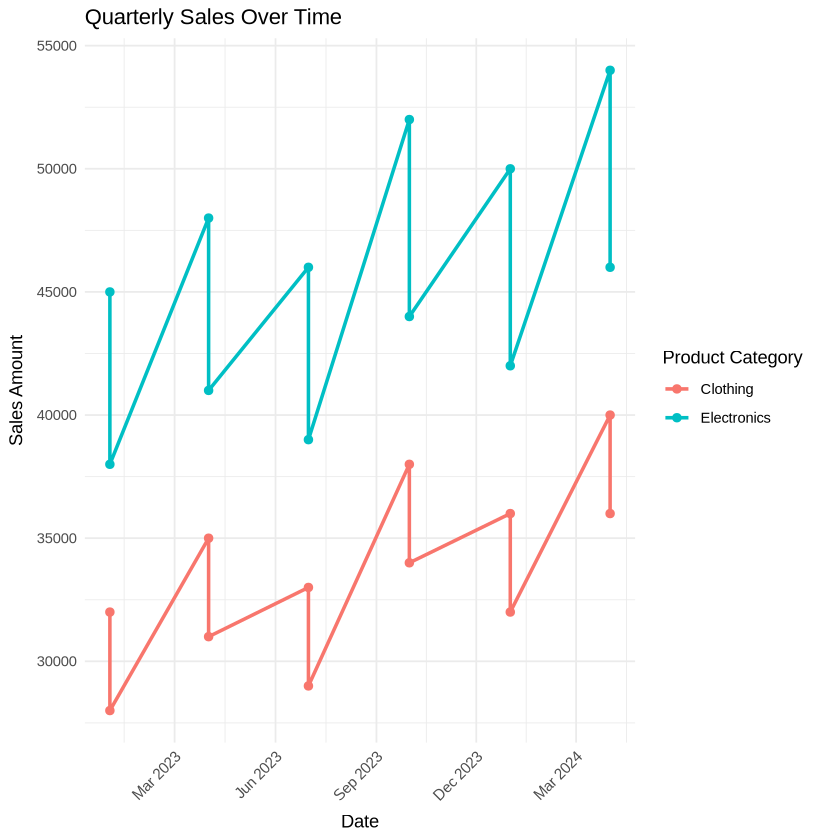

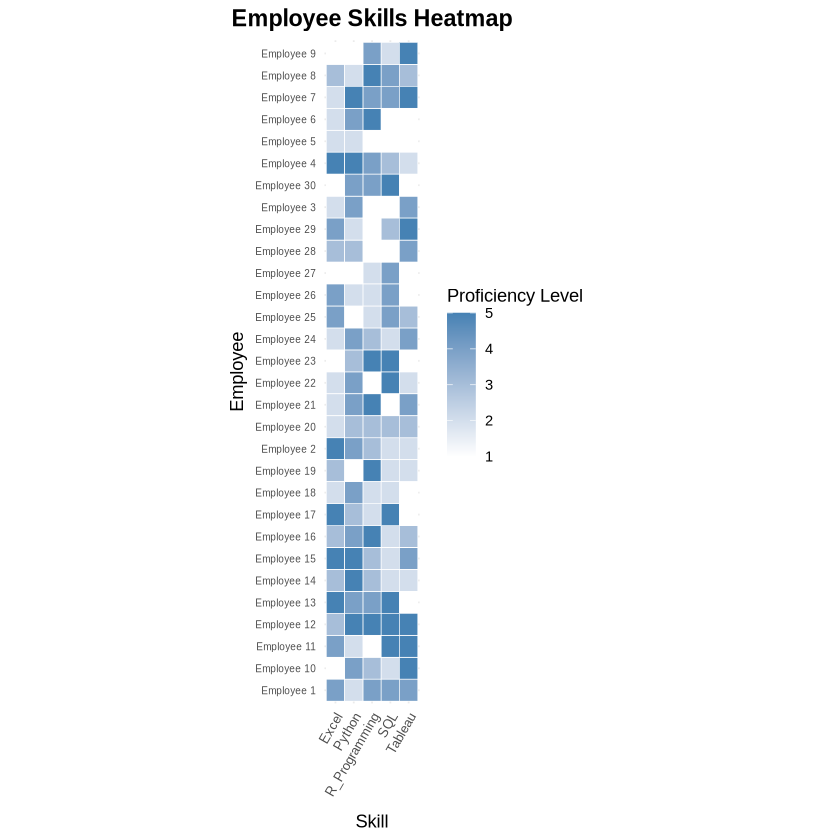

In [ ]:
# Task 7.2: Comparison Visualization Data
# YOUR CODE HERE: Create dataset for comparison visualization
ggplot(sales_trend_data, aes(x = Date, y = Sales_Amount, color = Product_Category)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Quarterly Sales Over Time",
    x = "Date",
    y = "Sales Amount",
    color = "Product Category"
  ) +
  theme_minimal() +
  scale_x_date(date_labels = "%b %Y", date_breaks = "3 months") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


employee_skills_long <- employee_skills_long %>%
  mutate(Skill = str_wrap(Skill, width = 12))  %>%
  arrange(Department, Employee_ID)

# Heatmap plot
ggplot(employee_skills_long, aes(x = Skill, y = Employee_Name, fill = Proficiency_Level)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(
    title = "Employee Skills Heatmap",
    x = "Skill",
    y = "Employee",
    fill = "Proficiency Level"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 60, hjust = 1, size = 8),
    axis.text.y = element_text(size = 6),
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  ) +
  coord_fixed(ratio = 1.2)



## Part 8: Analysis Questions

Using the reshaped datasets you've created, answer the following questions:

1. **Trend Analysis:** What trends do you observe in quarterly sales across different regions? Which region shows the most consistent growth?

2. **Skills Gap Analysis:** Based on the employee skills data, what are the most common skill gaps in the organization? Which skills are most prevalent?

3. **Survey Insights:** What are the key findings from the survey data? Are there any patterns in responses that suggest areas for improvement?

4. **Data Structure Impact:** How did reshaping the data change your ability to answer these business questions? Provide specific examples.

---

In [ ]:
# Analysis Question 1: Trend Analysis
# YOUR CODE HERE: Analyze quarterly sales trends


In [ ]:
# Analysis Question 2: Skills Gap Analysis  
# YOUR CODE HERE: Analyze employee skills gaps 
there seems to be some big gaps in skills for Tablue and Excel

In [ ]:
# Analysis Question 3: Survey Insights
# YOUR CODE HERE: Analyze survey response patterns


## Part 9: Reflection Questions

Answer the following questions in your submission:

1. **Tidy Data Philosophy:** Explain the concept of "tidy data" in your own words. Why is this concept important for data analysis, and how does it relate to the reshaping operations you performed?

2. **Format Selection:** For each of the datasets you worked with, explain when you would prefer the wide format versus the long format. What factors influence this decision?

3. **Business Context:** Describe three real-world business scenarios where data reshaping would be essential. For each scenario, explain what format the data might start in and what format would be needed for analysis.

4. **Tool Integration:** How do the reshaping capabilities of `tidyr` complement the data manipulation functions of `dplyr`? Provide examples of analyses that require both types of operations.

5. **Data Pipeline:** In a typical business analytics workflow, at what stage would you perform data reshaping? How does this fit into the overall data wrangling process?

---

**Submission Checklist:**

- [ ] R notebook with all code and outputs completed
- [ ] All required data reshaping operations completed successfully
- [ ] Data validation checks performed and documented
- [ ] Datasets prepared for visualization and further analysis
- [ ] Answers to analysis questions with supporting evidence
- [ ] Answers to reflection questions
- [ ] Code is well-commented and demonstrates understanding of when to use each reshaping function

Good luck!